## 🐶 Using Transfer Learning and TensorFlow 2.0 to Classify Different Dog Breeds
Who's that doggy in the window?

Dogs are incredible. But have you ever been sitting at a cafe, seen a dog and not known what breed it is? I have. And then someone says, "it's an English Terrier" and you think, how did they know that?

In this project we're going to be using machine learning to help us identify different breeds of dogs.

To do this, we'll be using data from the Kaggle dog breed identification competition. It consists of a collection of 10,000+ labelled images of 120 different dog breeds.

This kind of problem is called multi-class image classification. It's multi-class because we're trying to classify mutliple different breeds of dog. If we were only trying to classify dogs versus cats, it would be called binary classification (one thing versus another).

Multi-class image classification is an important problem because it's the same kind of technology Tesla uses in their self-driving cars or Airbnb uses in atuomatically adding information to their listings.

Since the most important step in a deep learng problem is getting the data ready (turning it into numbers), that's what we're going to start with.

We're going to go through the following TensorFlow/Deep Learning workflow:

1.Get data ready (download from Kaggle, store, import).

2.Prepare the data (preprocessing, the 3 sets, X & y).

3.Choose and fit/train a model (TensorFlow Hub, tf.keras.applications, TensorBoard, EarlyStopping).

4.Evaluating a model (making predictions, comparing them with the ground truth labels).

5.Improve the model through experimentation (start with 1000 images, make sure it works, increase the number of images).

6.Save, sharing and reloading your model (once you're happy with the results).

For preprocessing our data, we're going to use TensorFlow 2.x. The whole premise here is to get our data into Tensors (arrays of numbers which can be run on GPUs) and then allow a machine learning model to find patterns between them.

For our machine learning model, we're going to be using a pretrained deep learning model from TensorFlow Hub.

The process of using a pretrained model and adapting it to your own problem is called transfer learning. We do this because rather than train our own model from scratch (could be timely and expensive), we leverage the patterns of another model which has been trained to classify images.

## Get our workspace ready

In [ ]:
#Import Tensorflow into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:",tf.__version__)
print("TF Hub Version :",hub.__version__)
# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.15.0
TF Hub Version : 0.15.0
GPU available (YESS!!!!)


In [ ]:
#!unzip /content/drive/MyDrive/Dog_Breed/dog-breed-identification.zip

## Getting our data ready (turning images into tensors)


In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog_Breed/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: >

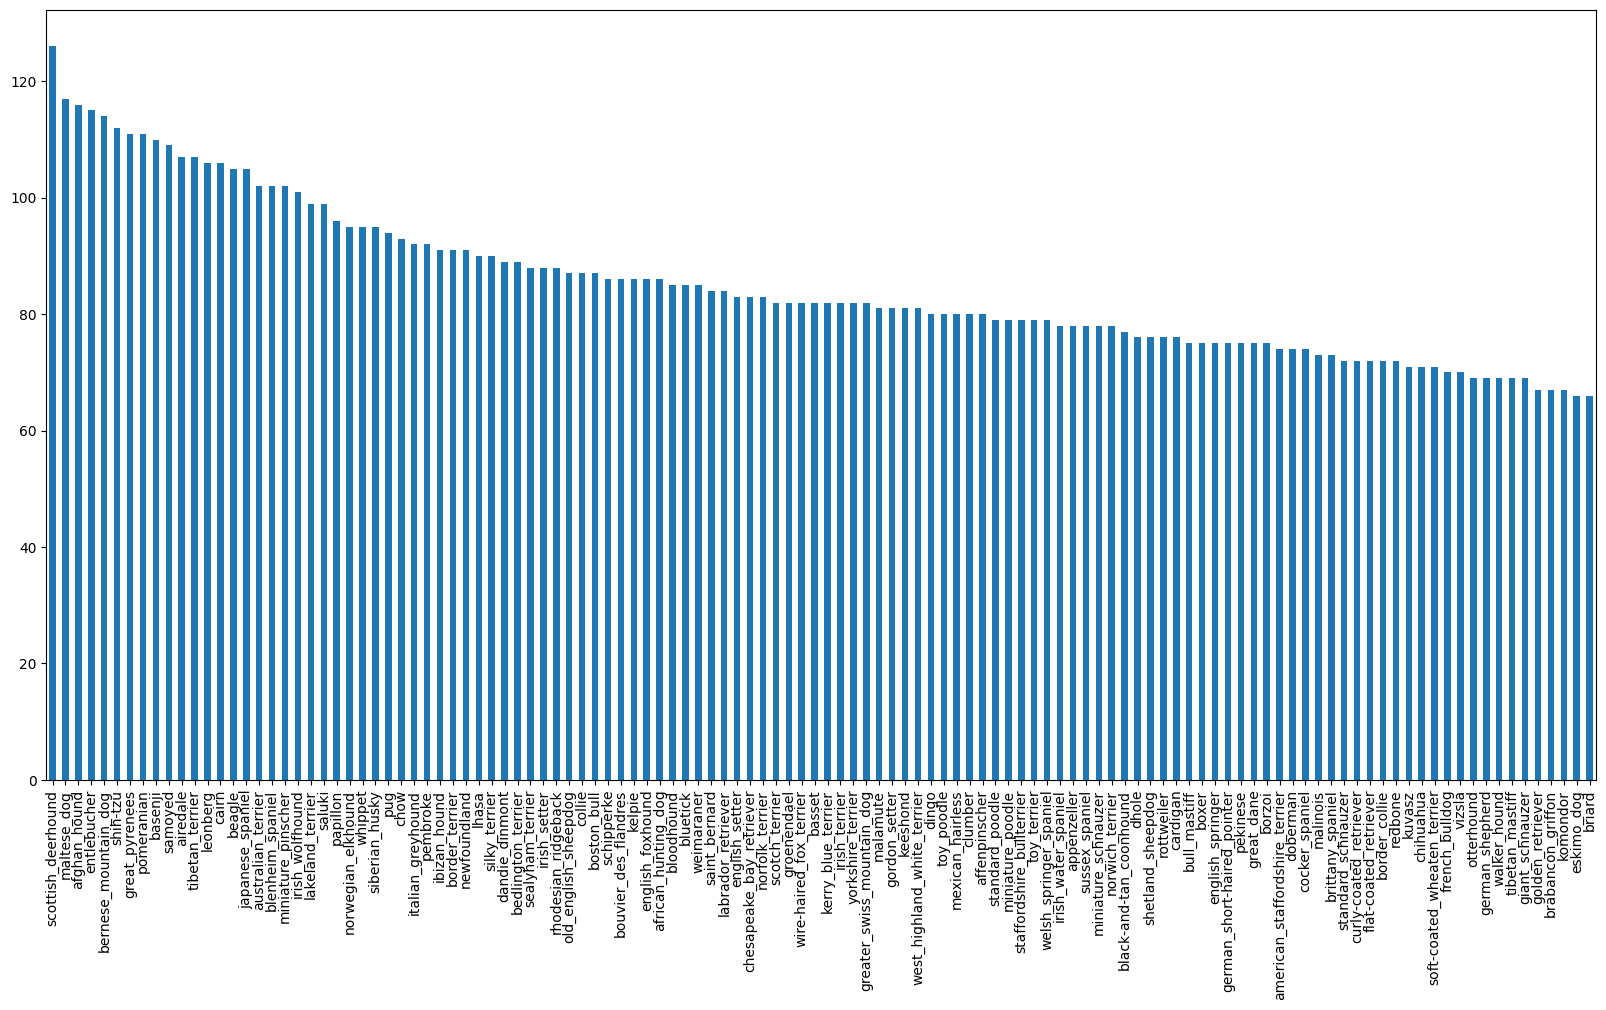

In [ ]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

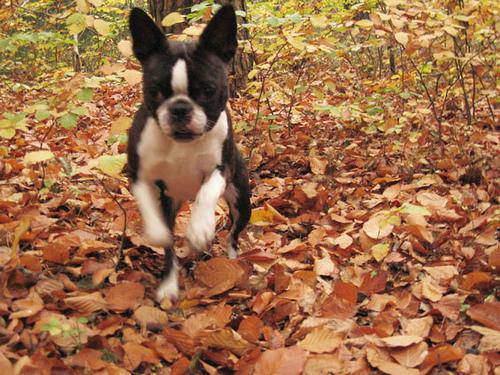

In [ ]:
#Let's view an image
from IPython.display import display, Image
Image("/content/drive/MyDrive/Dog_Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

###**Getting images and their labels**
Since we've got the image ID's and their labels in a DataFrame `(labels_csv)`, we'll use it to create:

In [ ]:
# Create pathnames from image ID's
filenames = ["/content/drive/My Drive/Dog_Breed/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10 filenames
filenames[:10]

['/content/drive/My Drive/Dog_Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Dog_Breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Dog_Breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Dog_Breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Dog_Breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Dog_Breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Dog_Breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Dog_Breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Dog_Breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/Dog_Breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("/content/drive/My Drive/Dog_Breed/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


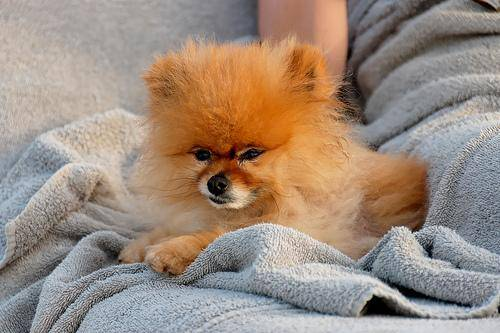

In [ ]:
# Check an image directly from a filepath
Image(filenames[8000])

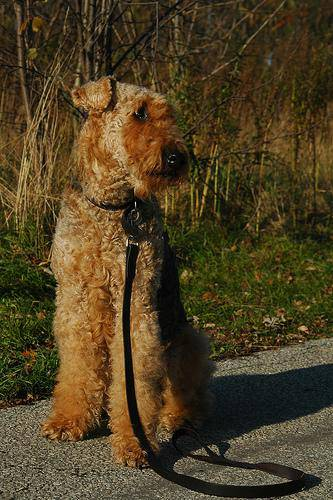

In [ ]:
# Check an image directly from a filepath
Image(filenames[5000])

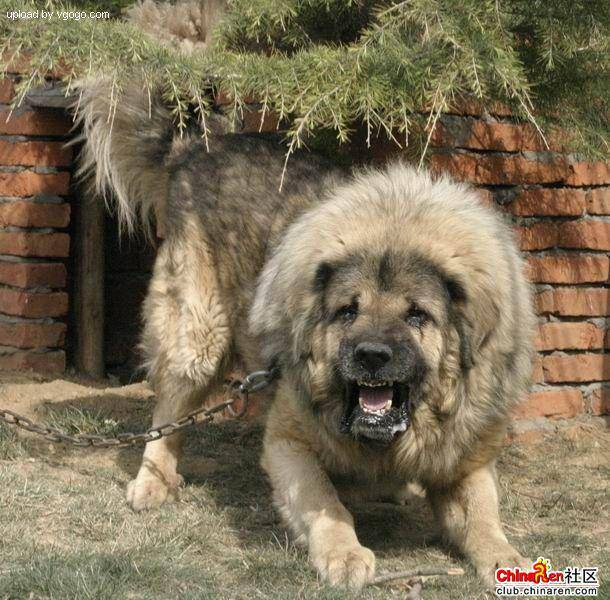

In [ ]:
# Check an image directly from a filepath
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [ ]:
import numpy as np
labels  = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
#See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories!")

Number of labels matches number of filenames!


In [ ]:
#Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example : Turning boolean array into integers
print(labels[0]) #original label
print(np.where(unique_breeds == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['/content/drive/My Drive/Dog_Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Dog_Breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Dog_Breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Dog_Breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Dog_Breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Dog_Breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Dog_Breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Dog_Breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Dog_Breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/Dog_Breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating our own validation set
Since the data from Kaggle doesn't come with validation set

In [ ]:
# Setup X and y variable
X = filenames
y = boolean_labels

Since we're working with 10,000+ images, it's a good idea to work with a portion of them to make sure things are working before training on them all.

This is because computing with 10,000+ images could take a fairly long time. And our goal when working through machine learning projects is to reduce the time between experiments.

Let's start experimenting with 1000 and increase it as we need.

In [ ]:
#Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

#Split them into training and validation of total size NUM_IMAGES
X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size = 0.2,random_state = 42)
len(X_train),len(y_train),len(X_val),len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a look at training data
X_train[:5],y_train[:5]

(['/content/drive/My Drive/Dog_Breed/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/My Drive/Dog_Breed/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/My Drive/Dog_Breed/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/My Drive/Dog_Breed/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/My Drive/Dog_Breed/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

### Preprocessing images(turning images into Tensors)
o preprocess our images into Tensors we're going to write a function which does a few things:

1) Takes an image filename as input.

2) Uses TensorFlow to read the file and save it to a variable, image.

3) Turn our image (a jpeg file) into Tensors.

4)Resize the image to be of shape (224, 224).

5)Return the modified image.

A good place to read about this type of function is the TensorFlow documentation on loading images.

You might be wondering why (224, 224), which is (heigh, width). It's because this is the size of input our model (we'll see this soon) takes, an image which is (224, 224, 3).

What? Where's the 3 from? We're getting ahead of ourselves but that's the number of colour channels per pixel, red, green and blue.

Let's make this a little more concrete.

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

In [ ]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Takes an image file path and turns the image into a Tensor

  """
  #Read in an image file
  image = tf.io.read_file(image_path)

  #Turn the jpeg image into numerical Tensor with 3 colours channels(RGB)
  image = tf.image.decode_jpeg(image,channels = 3)

  #Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)

  #Resize the image to our desired value(224,224)
  image = tf.image.resize(image,size = [IMG_SIZE,IMG_SIZE])

  return image

## Turning our data into batches
Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.

TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of  `process_image` function at the same time.

In [ ]:
# Create a simple function to return a tuple(image,label)
def get_image_label(image_path,label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image,label

In [ ]:
# Demo of the above
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a simple function to turn our image file path names and their associated labels into tuples (we can turn these into Tensors next), we'll create a function to make data batches.

Because we'll be dealing with 3 different sets of data (training, validation and test), we'll make sure the function can accomodate for each set.

We'll set a default batch size of 32 because according to Yann Lecun (one of the OG's of deep learning), friends don't let friends train with batch sizes over 32.

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X,y = None,batch_size = BATCH_SIZE,valid_data = False,test_data = False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  #If the data is test data , we probably don't have labels
  if test_data:
    print("Creating test data batches ...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    #Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))

    #Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size = len(X))

    #Create(image,label) tuples(this also turns the image into a preprocessed image)
    data = data.map(get_image_label)

    #Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data = True)

Creating training data batches...
Creating validation data batches...


In [ ]:
#Check out the different attributes of our data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches
But having our data in batches can be a bit of a hard concept to understand. Let's build a function which helps us visualize what's going on under the hood.

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")


In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
train_images,train_labels = next(train_data.as_numpy_iterator())
train_images,train_labels

(array([[[[0.20769505, 0.26552045, 0.11557366],
          [0.21014744, 0.26897097, 0.1023232 ],
          [0.22917545, 0.29192054, 0.11238856],
          ...,
          [0.22105342, 0.24066126, 0.16159967],
          [0.20052588, 0.23189843, 0.14954548],
          [0.19266437, 0.22403692, 0.14168397]],
 
         [[0.22463973, 0.28350702, 0.11776961],
          [0.24714005, 0.30929655, 0.1339289 ],
          [0.26273456, 0.32547966, 0.14107838],
          ...,
          [0.21542197, 0.23502982, 0.15659843],
          [0.2106922 , 0.24206474, 0.1597118 ],
          [0.19607845, 0.227451  , 0.14509805]],
 
         [[0.29011613, 0.35286123, 0.16770482],
          [0.28720763, 0.34995273, 0.16063903],
          [0.26115188, 0.3265843 , 0.12636547],
          ...,
          [0.22776902, 0.24490547, 0.17388825],
          [0.226523  , 0.25789553, 0.1755426 ],
          [0.197734  , 0.22910655, 0.1467536 ]],
 
         ...,
 
         [[0.7306469 , 0.6953528 , 0.6679018 ],
          [0.78575

In [ ]:
len(train_images),len(train_labels)

(32, 32)

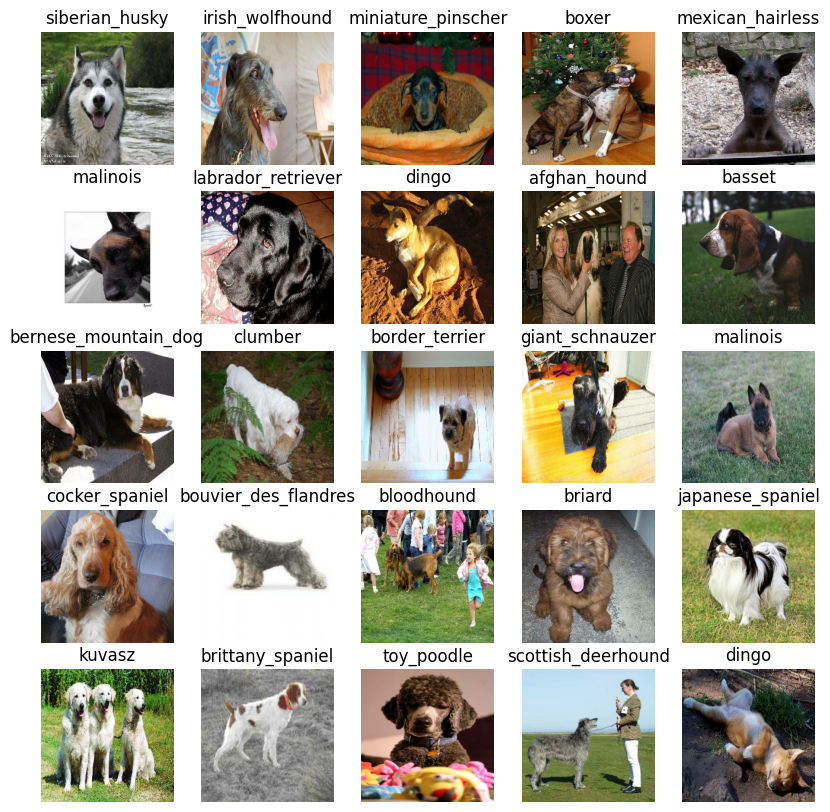

In [ ]:
# NOw let's visualize the data in a training batch
show_25_images(train_images,train_labels)

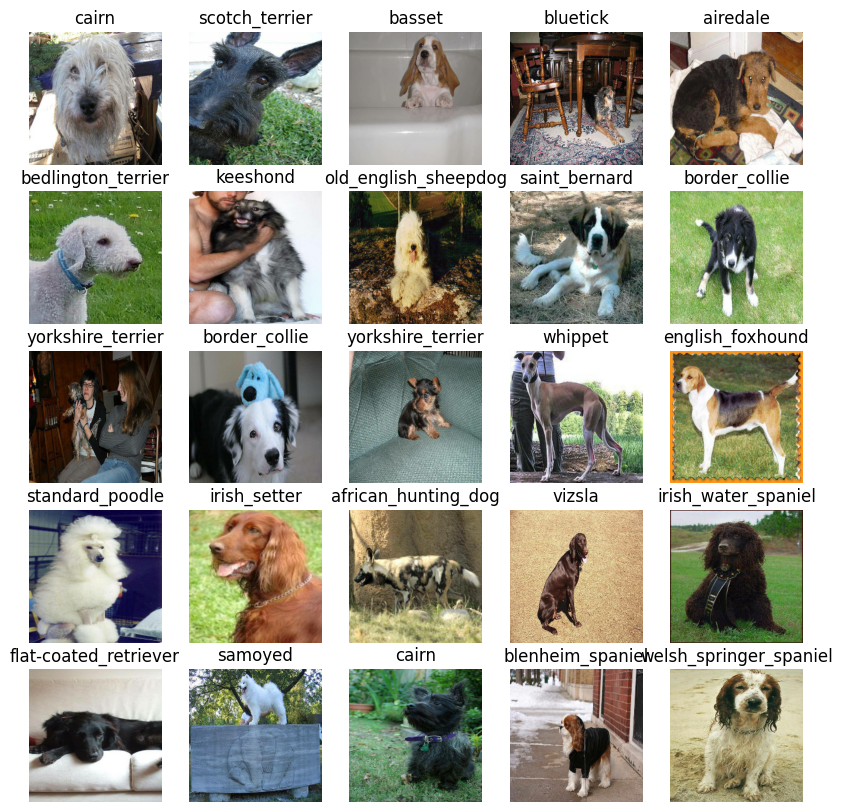

In [ ]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Building a model
Before we build a model, there are a few thing that we need to define:
* The input shape(our images shape, in the form of Tensors) to our model.
* The output shape(image labels, in the form of Tensors of our model)
* The URL of the model we want to use

In [ ]:
IMG_SIZE

224

In [ ]:
#Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE,3] #Batch,height,width,colour channels

#Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL from TensorFlow Hub
Model_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


Now we've got our inputs , outputs and model ready to go
Let's put them together into Keras deep learning model
Knowing this,let's creqate a function which :
* Takes the input shape
akes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

In [ ]:
# Create a function which builds a keras model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE,model_url = Model_URL):
  print("Building model with : ",Model_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(Model_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])
  #Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  #Build the model
  model.build(INPUT_SHAPE)

  return model


In [ ]:
model = create_model()
model.summary()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating callbacks

callbacks are helper function a model can use during to do things such as save its progress, check its progress or stop training early if a model stops improving.
We will create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model to train for too long.

### TensorBoard Callback
To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to model's fit() function.
3. Visualize our models training logs with the %tensorboard magic function(we'll do this after model training)

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime
#Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  #Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/Dog_Breed/logs",
                        #Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving


In [ ]:
#Create early stopping callback
early_stopping  = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",patience = 3)

## Training a model(or subset of data)
Our first model is only going to train on 1000 images, to make sure everything is working

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider",min : 10,max:100,step:10}

In [ ]:
# Check to make sure we're still running on a GPU
print("GPU", "available (YESSS!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSS!!!!!!)


### Let's create a function which trains a model.
* Create a model using create_model()
* Setup a TensorBoard callback using create_tensorboard_callback()
* Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use
*Return the model

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 105s 4s/step - loss: 4.5678 - accuracy: 0.1025 - val_loss: 3.3741 - val_accuracy: 0.3000
Epoch 2/100
25/25 [==============================] - 4s 164ms/step - loss: 1.6626 - accuracy: 0.6875 - val_loss: 2.1502 - val_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 4s 163ms/step - loss: 0.5775 - accuracy: 0.9388 - val_loss: 1.6064 - val_accuracy: 0.5900
Epoch 4/100
25/25 [==============================] - 4s 169ms/step - loss: 0.2515 - accuracy: 0.9900 - val_loss: 1.4451 - val_accuracy: 0.6350
Epoch 5/100
25/25 [==============================] - 4s 169ms/step - loss: 0.1466 - accuracy: 0.9962 - val_loss: 1.3751 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 7s 270ms/step - loss: 0.0994 - accuracy: 1.0000 - val_loss: 1.3378 - val_accuracy: 0.6450
Epoch 7/100
25/25 [=============================

Question: It looks like our model is overfitting because it's performing far better on the training dataset than the validation dataset, what are some ways to prevent model overfitting in deep learning neural networks?

Note: Overfitting to begin with is a good thing! It means our model is learning!!!

### Checking the TensorBoard logs
The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and visualize its contents.

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/Dog_Breed/logs

<IPython.core.display.Javascript object>

## Making and evaluating predictions using a trained model

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 111ms/step


array([[7.2989223e-04, 5.1749457e-04, 2.6794575e-04, ..., 7.5829244e-05,
        2.7311313e-05, 5.0558941e-03],
       [1.9341109e-03, 9.1305090e-04, 3.2056621e-03, ..., 7.4805756e-04,
        8.0358522e-04, 5.2328198e-04],
       [2.1267538e-06, 2.0399883e-04, 1.7904962e-06, ..., 1.8653502e-05,
        6.0507304e-05, 1.4047376e-04],
       ...,
       [9.0542826e-06, 1.6641499e-05, 6.6412613e-05, ..., 1.3072555e-05,
        3.6278838e-05, 1.0173132e-05],
       [1.2049531e-03, 2.0162288e-04, 1.4520023e-04, ..., 5.1061739e-05,
        1.8379824e-05, 4.6716738e-03],
       [2.8360760e-04, 1.4214016e-05, 1.0809825e-03, ..., 1.0450154e-03,
        3.9486281e-04, 6.1241066e-05]], dtype=float32)

In [ ]:
predictions[0]

array([7.29892228e-04, 5.17494569e-04, 2.67945754e-04, 1.17630691e-04,
       3.69065470e-04, 6.08699920e-05, 1.36617674e-02, 6.04701578e-04,
       3.04396854e-05, 4.22844809e-04, 4.71653533e-04, 5.93089499e-05,
       1.93651547e-04, 8.10154961e-05, 1.71438820e-04, 8.75546655e-04,
       6.96920106e-05, 2.55156189e-01, 2.43532086e-05, 6.46966000e-05,
       1.15575804e-03, 4.78279864e-04, 8.33831746e-06, 4.19201795e-03,
       1.11290436e-04, 2.06495941e-04, 1.52182683e-01, 8.36945765e-05,
       2.65300594e-04, 6.61398517e-04, 2.56210915e-04, 1.84166606e-03,
       3.70017864e-04, 2.02862520e-05, 7.57735106e-05, 9.65579897e-02,
       2.98193427e-05, 3.84608575e-04, 7.72235871e-05, 4.02577280e-04,
       1.37633237e-03, 2.29347606e-05, 2.69200653e-04, 4.05827624e-04,
       1.65289803e-05, 5.40637702e-05, 1.50039205e-05, 5.33465121e-04,
       4.06971143e-04, 9.62642589e-05, 8.34290331e-05, 2.63215024e-05,
       3.63242300e-03, 1.71999403e-04, 3.46579109e-05, 1.69077015e-04,
      

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.65761201e-04 1.23627528e-04 2.68333206e-05 8.56912346e-04
 2.30371254e-03 6.99684970e-05 2.30191072e-04 2.28155334e-03
 1.35971205e-02 3.01219653e-02 3.11641161e-05 2.47611370e-05
 8.31005455e-04 1.81466830e-03 7.93828571e-04 5.85696381e-03
 1.52558105e-05 2.78271677e-04 2.97006569e-04 7.97191344e-04
 8.46850671e-05 4.17293893e-04 5.19406640e-05 1.11930851e-04
 6.90832827e-03 5.66685922e-05 1.17392170e-04 9.10002782e-05
 4.08138614e-04 5.77262435e-05 1.80582821e-04 6.43736916e-04
 1.97783680e-04 1.38039904e-04 4.98669797e-05 2.20781058e-05
 2.27047894e-05 5.49269724e-04 6.26855108e-05 3.73531938e-01
 2.46843207e-04 7.62064519e-06 6.75267447e-03 5.91976677e-05
 1.70356929e-04 1.83016396e-04 1.17957672e-04 3.66511359e-03
 2.01246730e-05 1.49497195e-04 2.24907373e-04 7.67794336e-05
 5.69553406e-04 1.73542288e-03 2.23956104e-05 4.69201186e-04
 1.55019152e-04 5.19271453e-05 7.21362667e-05 1.32388132e-05
 7.39247262e-05 8.39005632e-04 3.00678585e-05 1.81623946e-05
 2.25966098e-04 8.281205

In [ ]:
unique_breeds[113]

'walker_hound'

Having the the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on!

**Note**: Prediction probabilities are also known as confidence levels.

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'brittany_spaniel'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

## Now we've got ways to get get:

* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visual.

We'll create a function which:

* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. ✅
* Convert the prediction probabilities to a predicted label. ✅
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

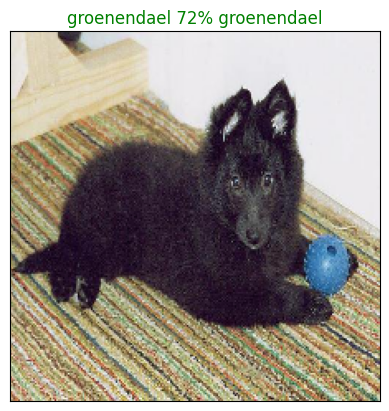

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:

* Take an input of prediction probabilities array and a ground truth array and an integer ✅
* Find the prediction using get_pred_label() ✅
* Find the top 10:
    * Prediction probabilities indexes ✅
    * Prediction probabilities values ✅
    * Prediction labels ✅
* Plot the top 10 prediction probability values and labels, coloring the true label green ✅

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

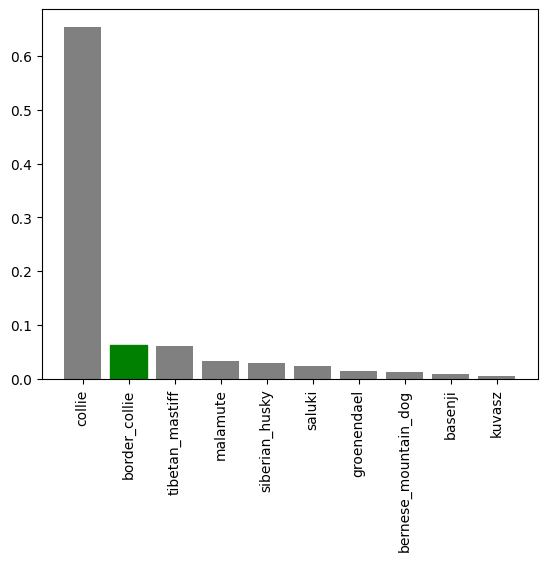

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

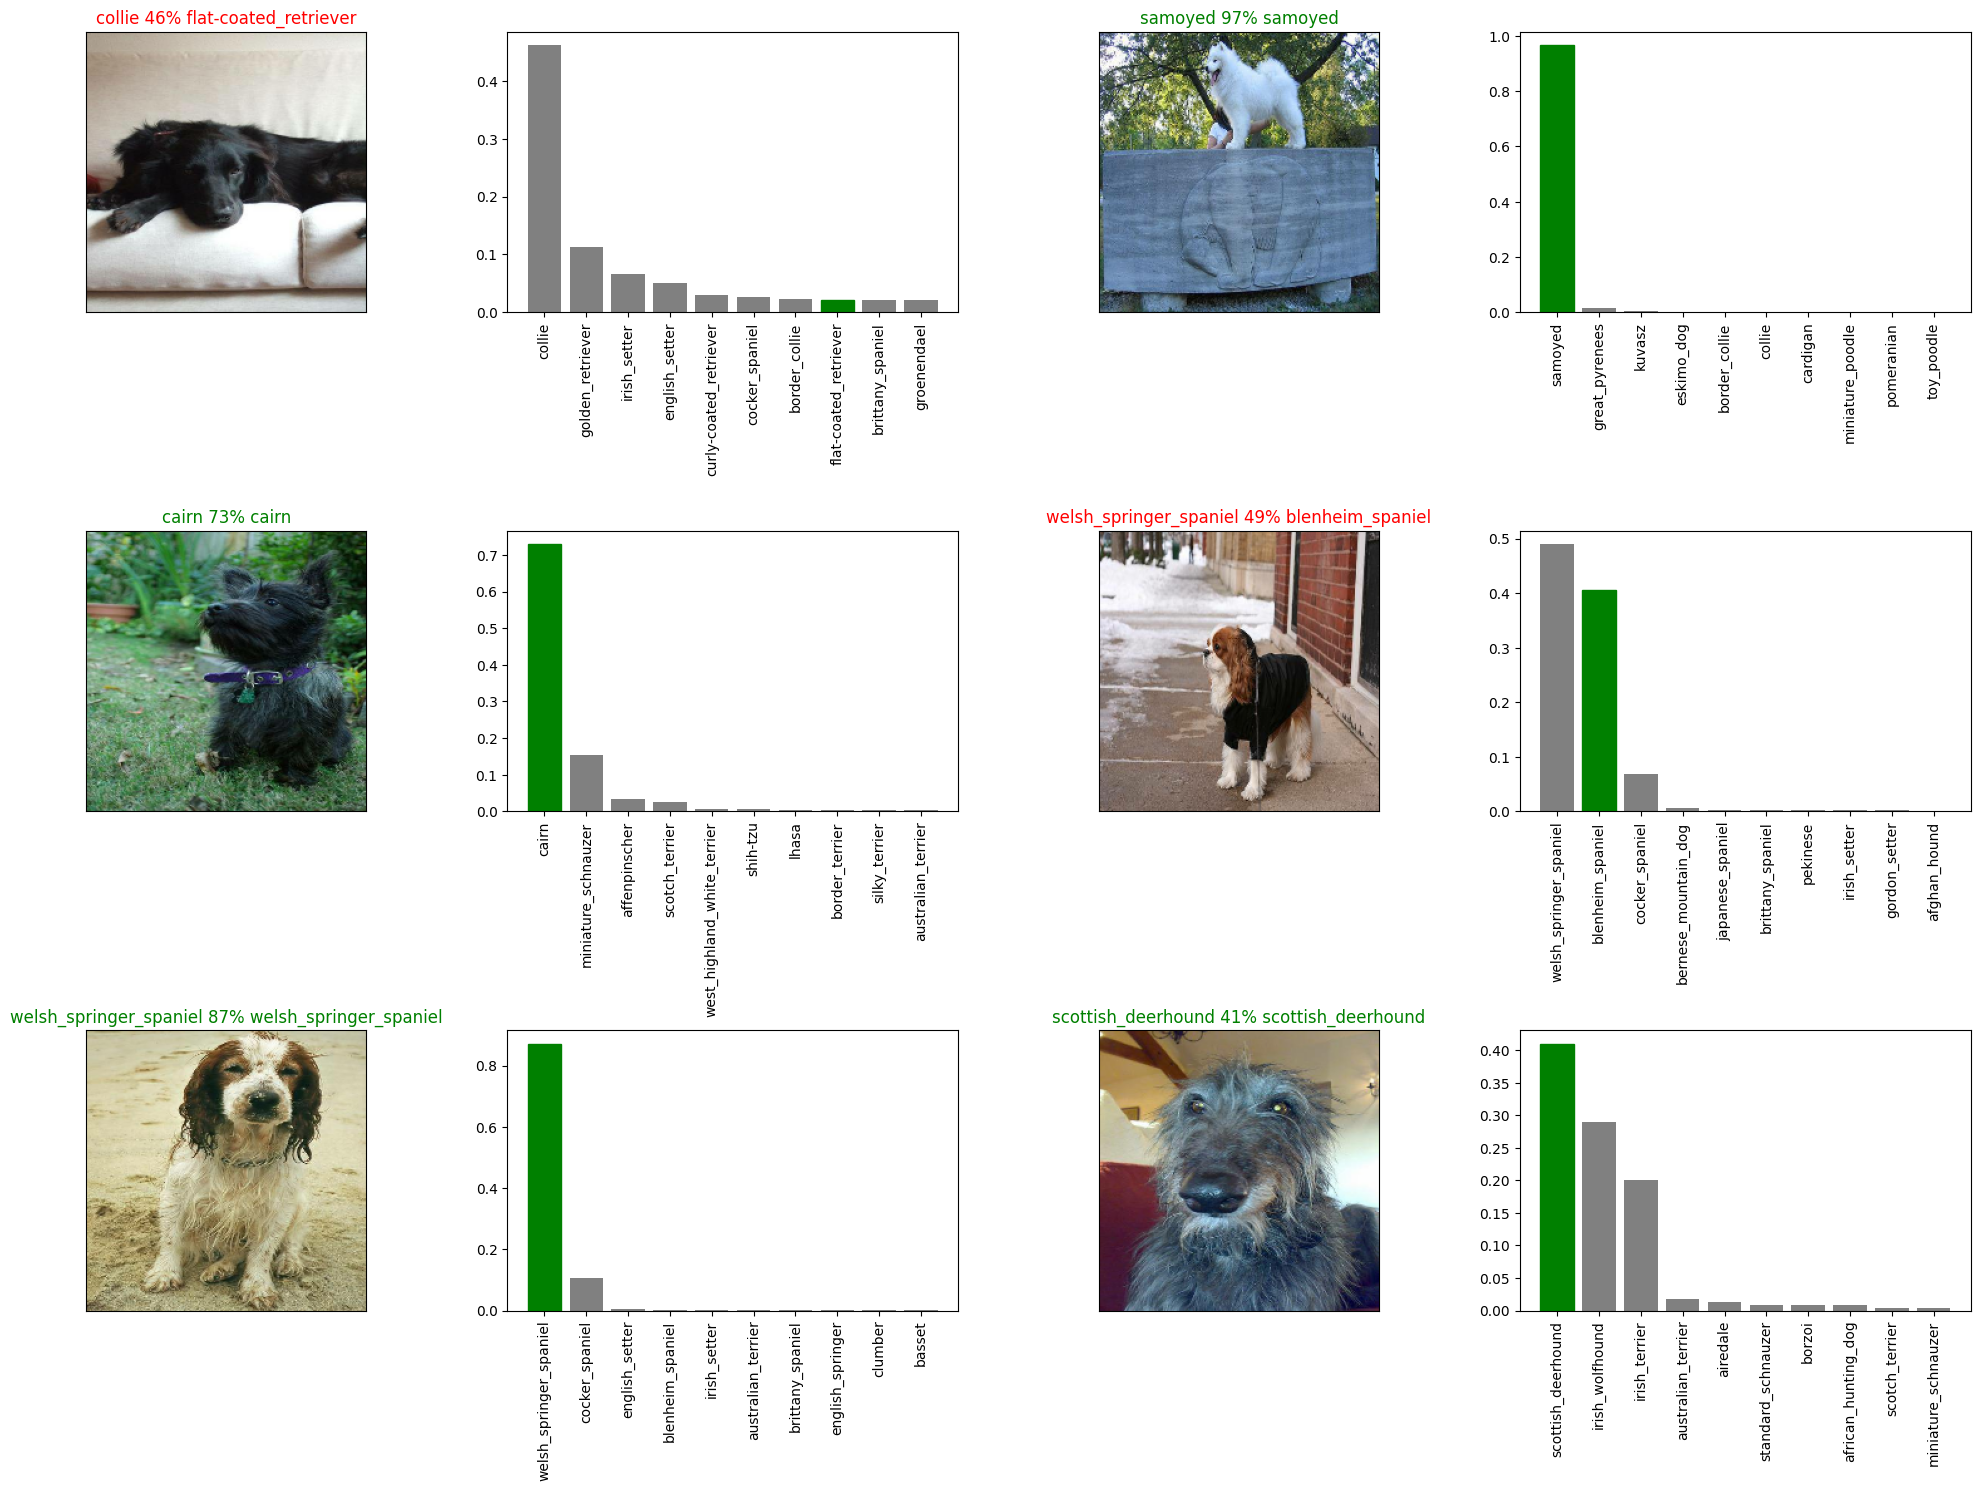

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [ ]:
#Create a function to save a model
def save_model(model,suffix = None):
  """
  Saves a given model in a models directory and appends a suffix(string)
  """
  #Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Dog_Breed/models",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5" #save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
#Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path
  """
  print(f"Loading saved model from :{model_path}")
  model = tf.keras.models.load_model(model_path,custom_objects = {"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model,suffix = "1000-images-mobilenetv2-Adam")

Saving model to: /content/drive/MyDrive/Dog_Breed/models/20240124-192605-1000-images-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/Dog_Breed/models/20240124-192605-1000-images-mobilenetv2-Adam.h5'

In [ ]:
#Load a trained model
loaded_1000_model = load_model('/content/drive/MyDrive/Dog_Breed/models/20240119-195720-1000-images-mobilenetv2-Adam.h5')

Loading saved model from :/content/drive/MyDrive/Dog_Breed/models/20240119-195720-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 100ms/step - loss: 1.2330 - accuracy: 0.6700


[1.2329539060592651, 0.6700000166893005]

In [ ]:
# Evaluate the loaded model
loaded_1000_model.evaluate(val_data)

7/7 [==============================] - 1s 102ms/step - loss: 1.2398 - accuracy: 0.7000


[1.2398226261138916, 0.699999988079071]

## Training a big dog model(on the full data)

In [ ]:
len(X),len(y)

(10222, 10222)

In [ ]:
#Create a data batch with the full data set
full_data = create_data_batches(X,y)

Creating training data batches...


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
#Create a model for full data
full_model = create_model()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
full_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [ ]:
#Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
#No validation set when training on all the data, so we can't monitor validation
full_model_early_stopping  = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",patience = 3)


In [ ]:
#Fit the full model to the full data
#full_model.fit(x = full_data,epochs = NUM_EPOCHS,callbacks = [full_model_tensorboard,full_model_early_stopping])

In [ ]:
#save_model(full_model,suffix = "full-image-set-mobilenetv2-Adam")

In [ ]:
#Load in the full model
loaded_full_model = load_model('/content/drive/MyDrive/Dog_Breed/models/20240119-220611-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from :/content/drive/MyDrive/Dog_Breed/models/20240119-220611-full-image-set-mobilenetv2-Adam.h5


## Making predictions on the test dataset
Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created create_data_batches() earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:

* Get the test image filenames. ✅
* Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since the test data doesn't have labels). ✅
* Make a predictions array by passing the test batches to the predict() method called on our model.

In [ ]:
# Load test image filenames
test_path = "/content/drive/MyDrive/Dog_Breed/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/Dog_Breed/test/eb0376e08d0575939eb1018313fab05b.jpg',
 '/content/drive/MyDrive/Dog_Breed/test/ef9de7d5f286c09daf1807e2ae67c98d.jpg',
 '/content/drive/MyDrive/Dog_Breed/test/f5a6e430c2c363335d22ae0593d7533a.jpg',
 '/content/drive/MyDrive/Dog_Breed/test/ee59d7c0fdd2344e9d6d815f1099ffb1.jpg',
 '/content/drive/MyDrive/Dog_Breed/test/f0311d1414f9ce10cffda4c207c108dc.jpg',
 '/content/drive/MyDrive/Dog_Breed/test/f3d0cbdba1dab4f22ab5510723dd969a.jpg',
 '/content/drive/MyDrive/Dog_Breed/test/f1705303b30da3a48db2a5f34376b947.jpg',
 '/content/drive/MyDrive/Dog_Breed/test/f3535f627d9d45218bd401ec24e250ac.jpg',
 '/content/drive/MyDrive/Dog_Breed/test/f0154b8ea1efd5dfb70e43fada42e56d.jpg',
 '/content/drive/MyDrive/Dog_Breed/test/ebe58f64e95c071d30eaceb907b7375c.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches ...


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
#Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,verbose = 1)

324/324 [==============================] - 195s 593ms/step


In [ ]:
#Save predictions (NumPy array) to csv file(for accessing later)
np.savetxt("/content/drive/MyDrive/Dog_Breed/preds_array.csv",test_predictions,delimiter=",")

In [ ]:
#Load predictions (Numpy array) from csv file
test_predictions = np.loadtxt("/content/drive/MyDrive/Dog_Breed/preds_array.csv",delimiter=",")

In [ ]:
test_predictions[:10]

array([[6.77212824e-07, 1.57678237e-09, 1.08165872e-10, ...,
        3.38087132e-12, 1.57903871e-10, 2.53673402e-08],
       [3.33703199e-14, 1.04713550e-07, 2.37426832e-13, ...,
        3.33659505e-13, 3.46057654e-08, 9.12476258e-12],
       [3.89091401e-05, 3.13445016e-05, 1.58880582e-11, ...,
        3.58746106e-12, 1.09925376e-11, 1.56432181e-12],
       ...,
       [7.79783321e-11, 3.72894561e-07, 7.98838101e-13, ...,
        3.35658861e-08, 1.24283125e-10, 1.26917504e-10],
       [8.86676830e-08, 2.83807808e-12, 4.40014969e-11, ...,
        2.48900581e-14, 1.46773240e-12, 1.83183590e-11],
       [1.30011436e-11, 3.06186292e-11, 1.24640898e-09, ...,
        4.52269167e-10, 1.66964587e-09, 6.23521679e-10]])

In [ ]:
test_predictions.shape

(10357, 120)

In [ ]:
["id"] + list(unique_breeds)

['id',
 'affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenen

## Preparing test dataset predictions for Kaggle
Looking at the Kaggle sample submission, it looks like they want the models output probabilities each for label along with the image ID's.

To get the data in this format, we'll:

* Create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns using the unique_breeds list and the test_predictions list.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [ ]:
# Create a panda Dataframe with empty columns
preds_df = pd.DataFrame(columns = ["id"]+list(unique_breeds))

In [ ]:
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
#Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

id affenpinscher afghan_hound  \
0  eb0376e08d0575939eb1018313fab05b           NaN          NaN   
1  ef9de7d5f286c09daf1807e2ae67c98d           NaN          NaN   
2  f5a6e430c2c363335d22ae0593d7533a           NaN          NaN   
3  ee59d7c0fdd2344e9d6d815f1099ffb1           NaN          NaN   
4  f0311d1414f9ce10cffda4c207c108dc           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  eb0376e08d0575939eb1018313fab05b   6.772128e-07  1.576782e-09   
1  ef9de7d5f286c09daf1807e2ae67c98d   3.337032e-14  1.047135e-07   
2  f5a6e430c2c363335d22ae0593d7533a   3.890914e-05  3.134450e-05   
3  ee59d7c0fdd2344e9d6d815f1099ffb1   1.300647e-07  6.631603e-08   
4  f0311d1414f9ce10cffda4c207c108dc   2.245428e-10  8.424591e-08   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.081659e-10  3.283183e-09                    1.544708e-08   
1         2.374268e-13  4.307827e-07                    2.239960e-13   
2         1.588806e-11  1.250086e-06                    1.107579e-11   
3         1.537233e-08  5.648374e-03                    1.779388e-09   
4         6.243967e-11  3.557718e-08                    2.005767e-04   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  5.337440e-10        7.119682e-09  8.312983e-08  1.618759e-09  ...   
1  2.898746e-13        1.624257e-10  1.774464e-13  5.015563e-09  ...   
2  4.211661e-11        2.011455e-12  1.804987e-08  3.128362e-10  ...   
3  2.722493e-11        2.862030e-07  8.286615e-09  1.445014e-08  ...   
4  1.211536e-08        3.040610e-09  1.560638e-08  6.383257e-10  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  4.818640e-07  3.048810e-08  6.991480e-08  1.882197e-09  2.669153e-09   
1  5.708298e-13  1.335516e-14  1.776397e-10  2.913096e-09  4.439837e-14   
2  7.546942e-09  1.380752e-11  7.614070e-10  5.305611e-10  2.063039e-08   
3  7.291164e-07  8.670979e-08  5.501718e-07  8.281168e-08  5.919534e-09   
4  2.792594e-10  2.303004e-13  2.174974e-03  7.286525e-04  7.099425e-05   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            3.264469e-09                 1.249574e-07  3.380871e-12   
1            1.513198e-12                 1.907395e-14  3.336595e-13   
2            1.148164e-12                 7.626653e-11  3.587461e-12   
3            1.483041e-07                 1.219548e-07  6.425213e-09   
4            1.527542e-08                 2.825647e-13  2.613928e-03   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.579039e-10       2.536734e-08  
1             3.460577e-08       9.124763e-12  
2             1.099254e-11       1.564322e-12  
3             9.697258e-02       2.037200e-06  
4             1.424820e-07       1.034105e-04  

[5 rows x 121 columns]

In [ ]:
#Save our predictions dataframe to CSV for submission to Kaggle
preds_df.to_csv("/content/drive/MyDrive/Dog_Breed/full_model_predictions_submission_1.csv",index = False)

## Making predictions on custom images


It's great being able to make predictions on a test dataset already provided for us.

But how could we use our model on our own images?

The premise remains, if we want to make predictions on our own custom images, we have to pass them to the model in the same format the model was trained on.

To do so, we'll:

* Get the filepaths of our own images.
* Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.
* Pass the custom image data batch to our model's predict() method.
* Convert the prediction output probabilities to prediction labels.
* Compare the predicted labels to the custom images.
* Note : To make predictions on custom images, I've uploaded pictures of my own to a directory located at drive/My Drive/Data/dogs/ (as seen in the cell below). In order to make predictions on your own images, you will have to do something similar.

In [ ]:
# Get custom image filepaths
custom_path = "/content/drive/MyDrive/Dog_Breed/custom_images/"
custom_image_paths= [custom_path + fname for fname in os.listdir(custom_path)[:3]]

In [ ]:
custom_image_paths

['/content/drive/MyDrive/Dog_Breed/custom_images/dog1.jpeg',
 '/content/drive/MyDrive/Dog_Breed/custom_images/dog3.jpeg',
 '/content/drive/MyDrive/Dog_Breed/custom_images/dog4.jpeg']

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths,test_data = True)
custom_data

Creating test data batches ...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 817ms/step


In [ ]:
custom_preds.shape

(3, 120)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['german_shepherd', 'siberian_husky', 'english_foxhound']

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

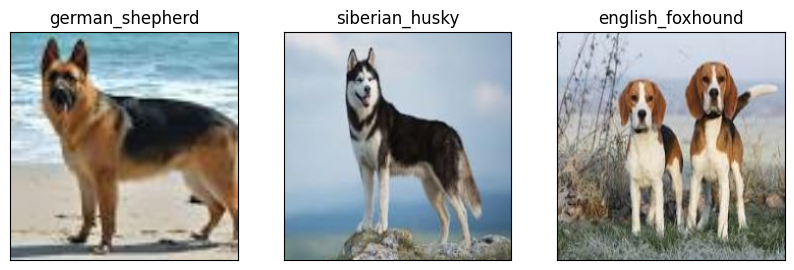

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)